# Project - Term Deposit Sale


# Objective:
The project objective is to use the data collected from existing customers, build a model that will help the marketing
team identify potential customers who are relatively more likely to subscribe term deposit
and thus increase their hit ratio. 

## Dataset Information

The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


## Attribute Information:



Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this
client
14. pdays: number of days that passed by after the client was last contacted from a
previous campaign (-1 tells us the person has not been contacted or contact
period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last
campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign

Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

## Import Libraries and some necessary modules¶

In [1]:
#Import the necessary modules
import pandas as pd
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import the necessary modules
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
#importing the Encoding library
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
import pydotplus
import graphviz

In [3]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Load Dataset

In [4]:
#reading the CSV file into pandas dataframe
df=pd.read_csv('bank-full.csv')

## Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)


### 1. Univariate analysis (12 marks) 

#### a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

In [5]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
df.shape
# the dataset has 45211 rows and 17 columns

(45211, 17)

In [8]:
#Check for null values or incorrect imputation
df.isna().sum()
# the result below suggests no null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
# Check if any missing value
df.isnull().any()
# the result below also suggests no null values  data

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [10]:
#To show the detailed summary 
df.info()
#dataset has a mix of int64 and objects with strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
df.dtypes
#dataset has a mix of int64 and objects with strings

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

* The datatypes of the columns: job, marital, education, default, housing, loan, contact, month, poutcome and Target are categorical data types contain strings.

In [12]:
#levels of variable
df['job'].value_counts()
#There is an 'unknown' category that is notin the data dictionary. This will be addressed
#blue-collar and management had the highest categories

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
#levels of variable
df['marital'].value_counts()
#married had the highest and almost twice as many as the single and divorced combined

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [14]:
#levels of  variable
df['education'].value_counts()
# education has 4 unique values, but according to the data dictionary there should be only 3 categories.
# the category 'unknown' will need to be addresse
#secondary education was the highest

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [15]:
#levels of  variable
df['default'].value_counts()
#many of the customers did not default on their loan

no     44396
yes      815
Name: default, dtype: int64

In [16]:
#levels of  variable
df['housing'].value_counts()
# the breakdown between those that took a housing loan and those that did not fairly even

yes    25130
no     20081
Name: housing, dtype: int64

In [17]:
#levels of  variable
df['loan'].value_counts()
#majority of people did not have a personal loan with the bank

no     37967
yes     7244
Name: loan, dtype: int64

In [18]:
#levels of variable
df['contact'].value_counts()
# there is an unknown category  which will be addressed.
# majority of clients were contacted via their cell phone

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [19]:
#levels of variable
df['month'].value_counts()
# The last month that a client was contacted had 12 unique values. 
#All months represented with the majority of clients contacted  last in the month of may

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [20]:
#levels of variable
df['poutcome'].value_counts()
# there is an 'other' category which is not in the data dictionary. This will be addressed.

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [21]:
#levels of variable
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

#### Print the descriptive statistics of each & every column using describe() function

In [22]:
#Statistical summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


### <a id = "link2"></a> Initial Insights


For the Univariate analysis and based on items computed so far, AND THE GIVEN DATA SET sample, we summarize our initial  insights as follows: (this is in addition to comments already made in the jupyter notebook cells)
- we did not observe any null values based on null check using isnull()
- We did not observe any missing values in the original data based on the computation of the .shape and .info. However additional investigation will be done

- From the description of the dataset as well as the result of  using the describe()  we make the following observations

age: slighty right-skewed, mean and median values very close;
job: object containing strings and with an unknown category that is not in data dictionary

marital:object containing strings with 3 levels or categories

education:string object with 4 unique values instead of the expected 3. The 'unknown' category not in data dictionary

default:  object containing strings with Yes/No type which will be mapped to ordinals 1 or 0

housing: object containing strings with Yes/No type which will be mapped to ordinals 1 or 0

loan:  object containing strings with Yes/No type which will be mapped to ordinals 1 or 0

balance: right-skewed. Data contains negative values. This is acceptable as balances can have negative values. However there is possibility of outliers which will need to be addressed.

contact: object containing strings with 3 unique values but with an 'unknown' category not in data dictionary

month: object containing strings with 12 unique values. This is Ok as they correspond to the 12 unique months in the year

day: the mean is very close to the median nealy uniform distribution

duration: right-skewed  and data may have outliers

campaign:  right-skewed  

pdays:  negative value defined in the data dictionary. 

previous: right-skewed  and may have outliers
poutcome:object containing stringswith  4 unique values but with the 'other' category with relatively larger number. Possible candidate column for dropping
Target: object containing strings with  Yes/No type which can be mapped to ordinals 1 or 0.

#### b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

* From the initial insights given, the following strategies were adopted to address some of the issues
1. Convert all the string objects to categorical type which is the right data type
2. Drop the column 'poutcome' since it is dominated by 'unknown' category which if not removed may distort the data and modelresults
3. Convert all the categorical columns with Yes/No  to 1 0 ordinals
4. Columns 'job', 'education', 'contact', which have 'unknown' or 'other' category need to be treated. Our strategy was to find and remove these data points. The strategy adopted here was to remove the rows concerned. We did not make any attempt at imputing the values. Also We used logical masks to identify and remove the rows with unknown category.
5. Outliers. The strategy adopted  was to compute the Zscores and remove the data points with Zscores > 3 . The threshold of 3 is a standard value used in such determination.

6. These strategies are implemented in the following

In [23]:
# drop column 'poutcome'
df.drop('poutcome', inplace=True, axis=1)

In [24]:
#convert the objects with strings to categorical type
df['Target']=df.Target.astype('category')
df['job']=df.job.astype('category')
df['marital']=df.marital.astype('category')
df['education']=df.education.astype('category')
df['default']=df.default.astype('category')
df['housing']=df.housing.astype('category')
df['loan']=df.loan.astype('category')
df['contact']=df.contact.astype('category')
df['month']=df.month.astype('category')


df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
Target       category
dtype: object

In [25]:
#Encoding of some of the categorical variables  

labelencoder_X=LabelEncoder()
df['marital']=labelencoder_X.fit_transform(df['marital'])
df['default']=labelencoder_X.fit_transform(df['default'])
df['housing']=labelencoder_X.fit_transform(df['housing'])
df['loan']=labelencoder_X.fit_transform(df['loan'])
df['Target'] = labelencoder_X.fit_transform(df['Target'])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,Target
0,58,management,1,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0
1,44,technician,2,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,1,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,0
3,47,blue-collar,1,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,0
4,33,unknown,2,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,0


In [26]:
#levels of variable
df['marital'].value_counts()


1    27214
2    12790
0     5207
Name: marital, dtype: int64

In [27]:
#levels of variable
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

* number of days that passed by after the client was last contacted from a
previous campaign ( from the data dictionary a value of -1 tells us the person has not been contacted or contact
period is beyond 900 days)
From the above results a majority of people have not been contacted and recommend to the business to make a fresh start to contact people and get more data. After some investigation we decided to drop this column because including the feature may imapct the model results.

* In the following Columns  such as 'job', 'education', 'contact', which have 'unknown' or 'other' category are  treated.  We used logical masks to identify and remove the rows with unknown category.

In [28]:
# drop 'pdays'
df.drop('pdays', inplace=True, axis=1)

In [29]:
valid_job_mask = df['job'] != 'unknown'
valid_job_mask[0:5]

0     True
1     True
2     True
3     True
4    False
Name: job, dtype: bool

In [30]:
valid_education_mask = df['education'] != 'unknown'
valid_education_mask[0:5]

0     True
1     True
2     True
3    False
4    False
Name: education, dtype: bool

In [31]:
valid_contact_mask = df['contact'] != 'unknown'
valid_contact_mask[0:5]

0    False
1    False
2    False
3    False
4    False
Name: contact, dtype: bool

In [32]:
# check how many rows have no unknown values in 'job'
sum(valid_job_mask)

44923

In [33]:
#clean the data by eliminating rows with the unknown values of 'job'
df_clean1 = df.loc[valid_job_mask,:].copy()

In [34]:
#shape of the cleaned data
df_clean1.shape

(44923, 15)

In [35]:
#levels of Y variable
df_clean1['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown             0
Name: job, dtype: int64

In [36]:
sum(valid_education_mask)

43354

In [37]:
#clean the data by eliminating rows with the unknown values of 'education'
df_clean2 = df_clean1.loc[valid_education_mask,:].copy()

In [38]:
#shape of the cleaned data
df_clean2.shape

(43193, 15)

In [39]:
#levels of Y variable
df_clean2['education'].value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown          0
Name: education, dtype: int64

In [40]:
sum(valid_contact_mask)

32191

In [41]:
#clean the data by eliminating rows with the unknown values of 'contact'
df_clean = df_clean2.loc[valid_contact_mask,:].copy()

In [42]:
#shape of the cleaned data
df_clean.shape

(30907, 15)

In [43]:
#levels of Y variable
df_clean['contact'].value_counts()

cellular     28213
telephone     2694
unknown          0
Name: contact, dtype: int64

In [44]:
#Encoding of the remaining treated categorical variables

labelencoder_X=LabelEncoder()
df_clean['job']=labelencoder_X.fit_transform(df_clean['job'])
df_clean['education']=labelencoder_X.fit_transform(df_clean['education'])
df_clean['contact']=labelencoder_X.fit_transform(df_clean['contact'])
df_clean['month']=labelencoder_X.fit_transform(df_clean['month'])

In [45]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,Target
12657,27,4,2,1,0,35,0,0,0,4,5,255,1,0,0
12658,54,1,1,0,0,466,0,0,0,4,5,297,1,0,0
12659,43,1,1,1,0,105,0,1,0,4,5,668,2,0,0
12660,31,9,2,1,0,19,0,0,1,4,5,65,2,0,0
12661,27,9,2,1,0,126,1,1,0,4,5,436,4,0,0


In [46]:
df_clean.shape

(30907, 15)

#### treatment of outliers based on zscores

In [47]:
#calculate z-scores
from scipy import stats
#import scipy.stats as stats
z_scores = np.abs(stats.zscore(df_clean))

In [48]:
#narrow down data set to all columns wit z scores of less than 3
df_clean = df_clean[(z_scores < 3).all(axis=1)]
print ("data frame with no outliers shape", df_clean.shape)
print ("data frame with no outliers describe", df_clean.describe)

data frame with no outliers shape (25719, 15)
data frame with no outliers describe <bound method NDFrame.describe of        age  job  marital  education  default  balance  housing  loan  contact  \
12657   27    4        2          1        0       35        0     0        0   
12658   54    1        1          0        0      466        0     0        0   
12659   43    1        1          1        0      105        0     1        0   
12661   27    9        2          1        0      126        1     1        0   
12664   29    1        2          0        0      343        0     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45203   23    8        2          2        0      113        0     0        0   
45204   73    5        1          1        0     2850        0     0        0   
45205   25    9        2          1        0      505        0     1        0   
45206   51    9        1          2        0      825        0     0     

* In the following a data dictionary was maintained separately to enable analyses of the distplot. Since these are ordered.
For example:
assumed mapping for 'marital'
marital_mapping = {
    0: "divorced",
    1: "married",
    2: "single"
}
...

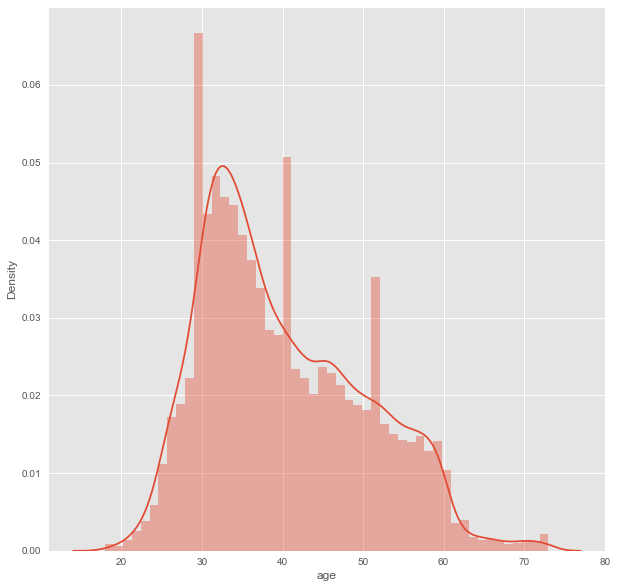

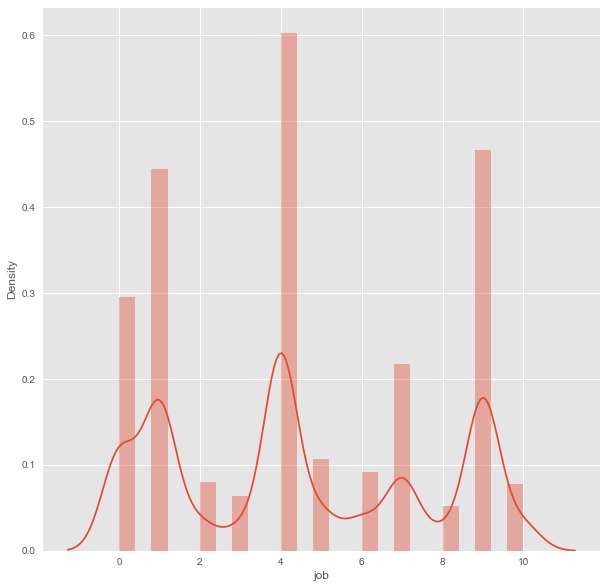

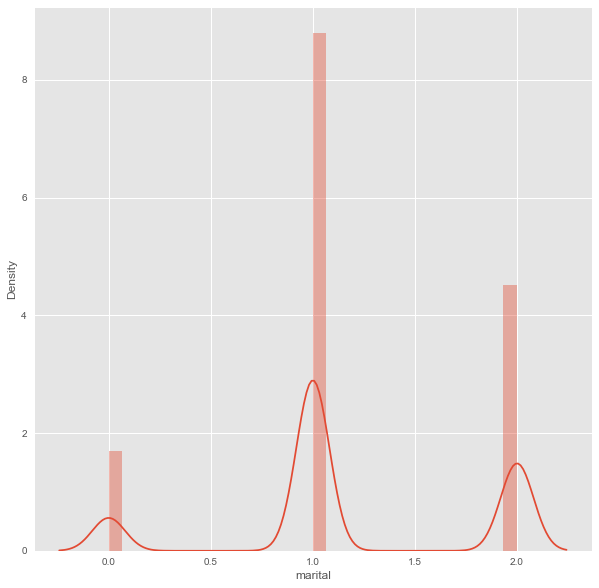

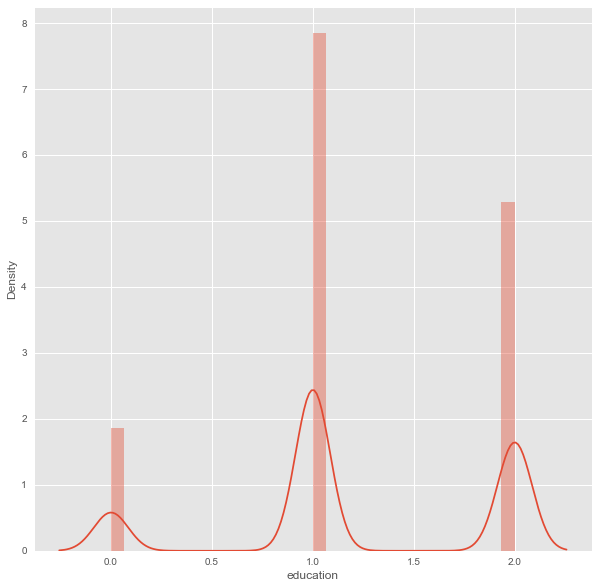

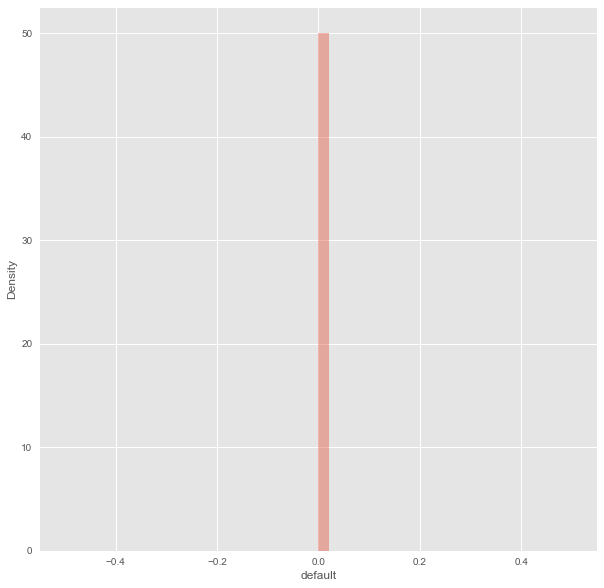

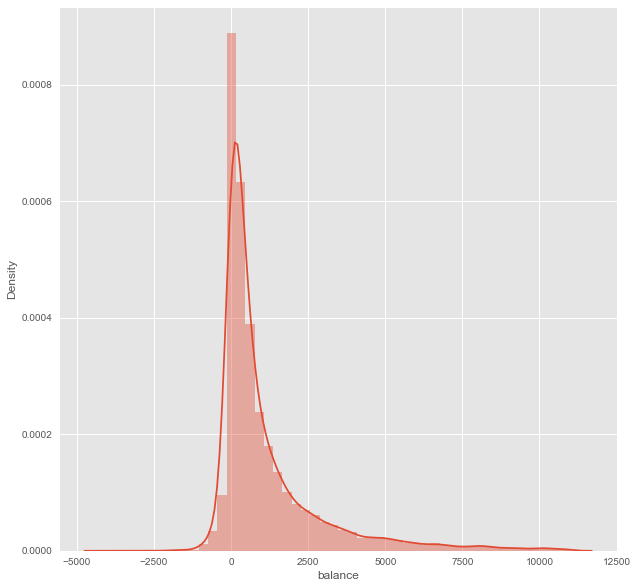

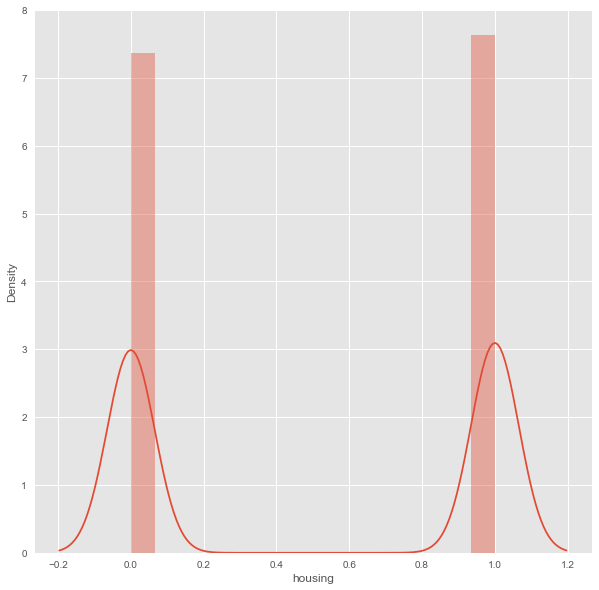

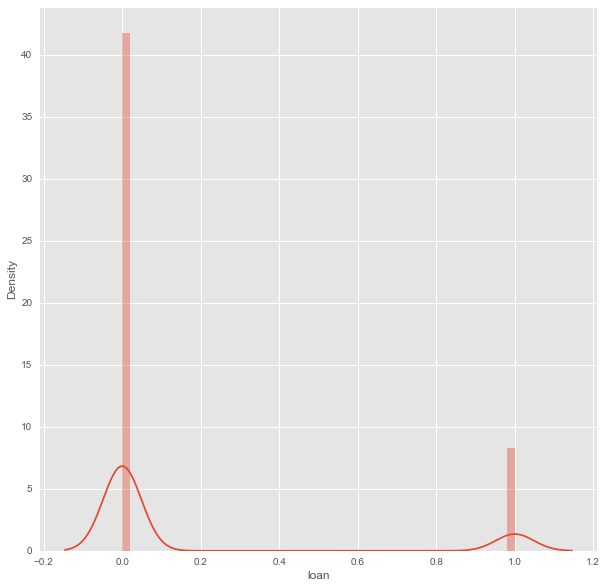

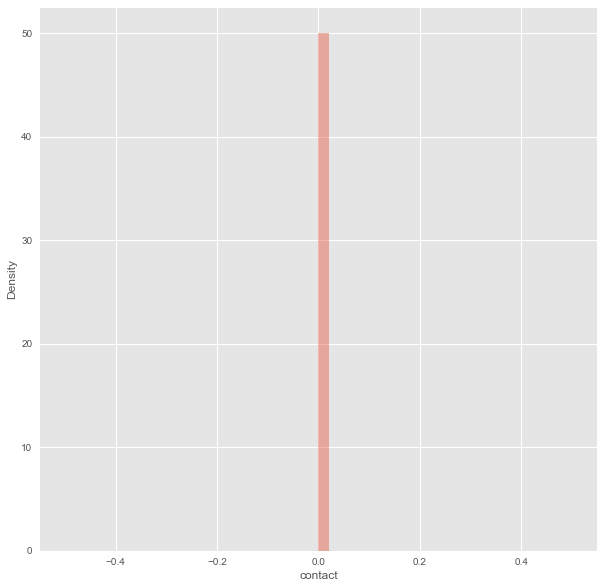

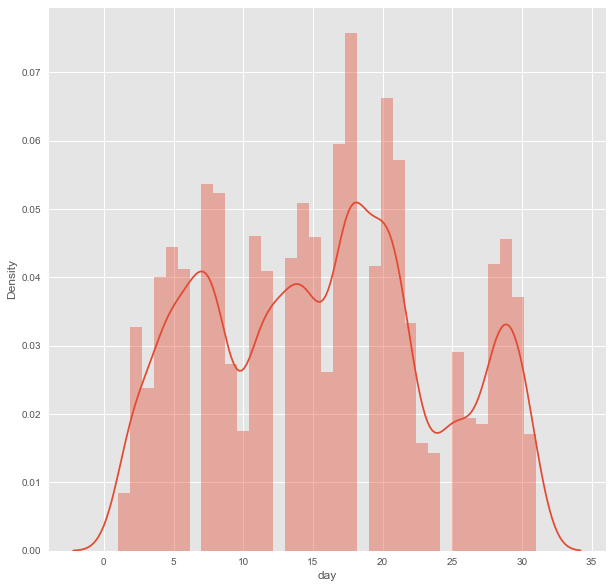

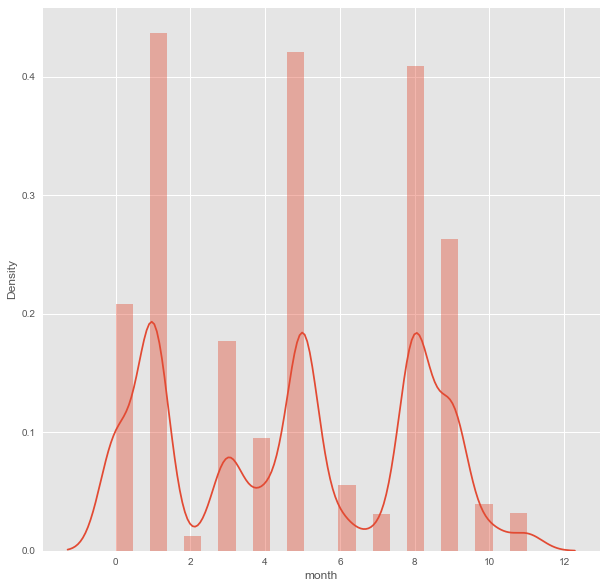

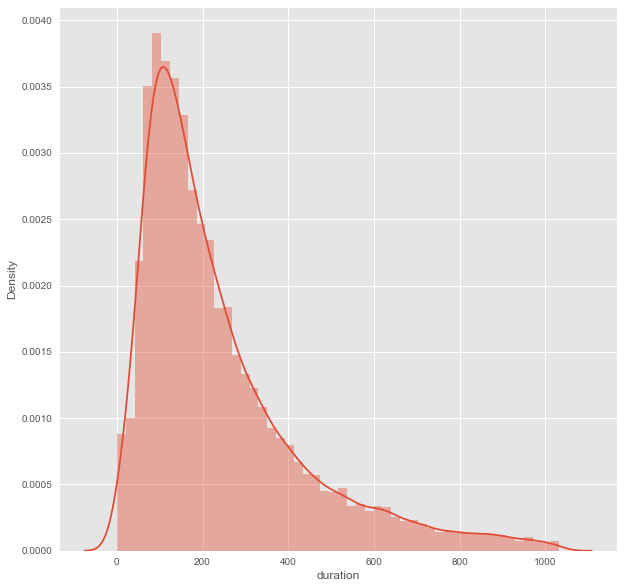

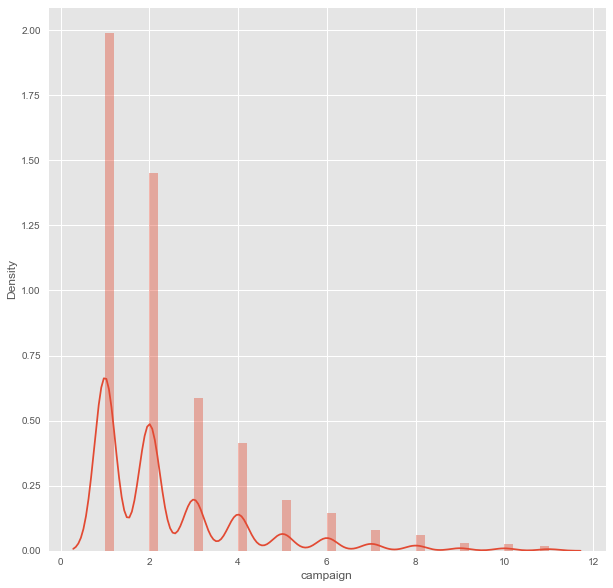

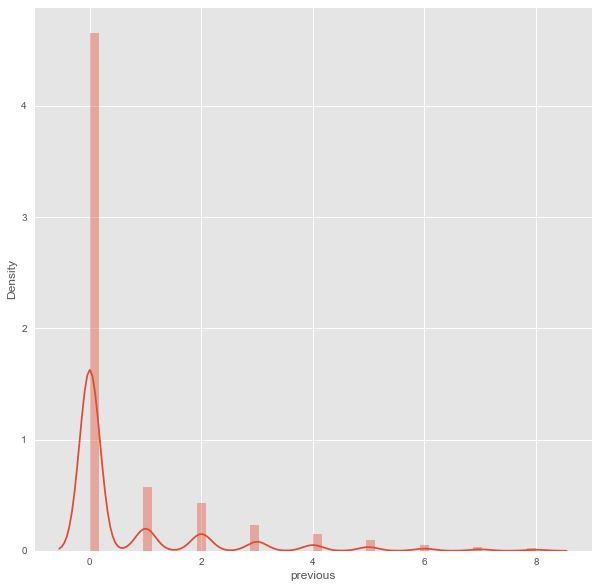

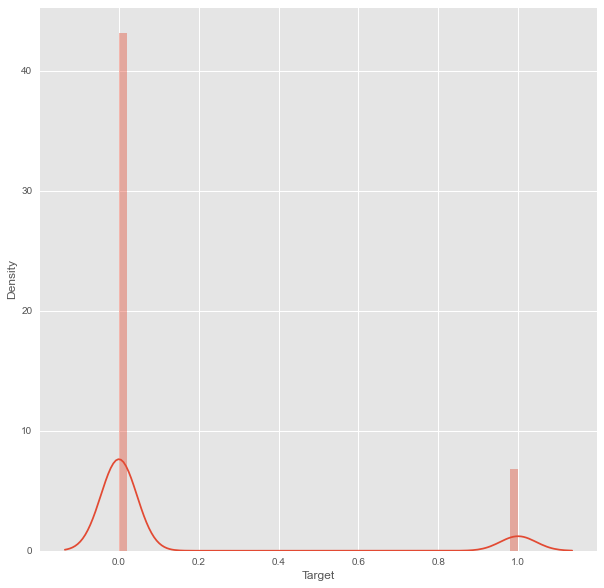

In [49]:
#Distribution of all the columns and also assess the skewness
for i in df_clean.columns:
    plt.figure(figsize = (10,10))
    sns.distplot(df_clean[i])
    plt.show()

#### c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

*  Please refer to the repective data dictionary and also to the previous initial insights
* W.r.t the distplot
-- many of the customers did not default on their loan
-- married had the highest and almost twice as many as the single and divorced combined
-- secondary education was the highest
-- the breakdown between those that took a housing loan and those that did not fairly even
-- majority of people did not have a personal loan with the bank
-- majority of clients were contacted via their cell phone
-- The last month that a client was contacted had 12 unique values. 
-- all months represented with the majority of clients contacted  last in the month of may

### 2. Multivariate analysis (8 marks)

#### a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any.Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.


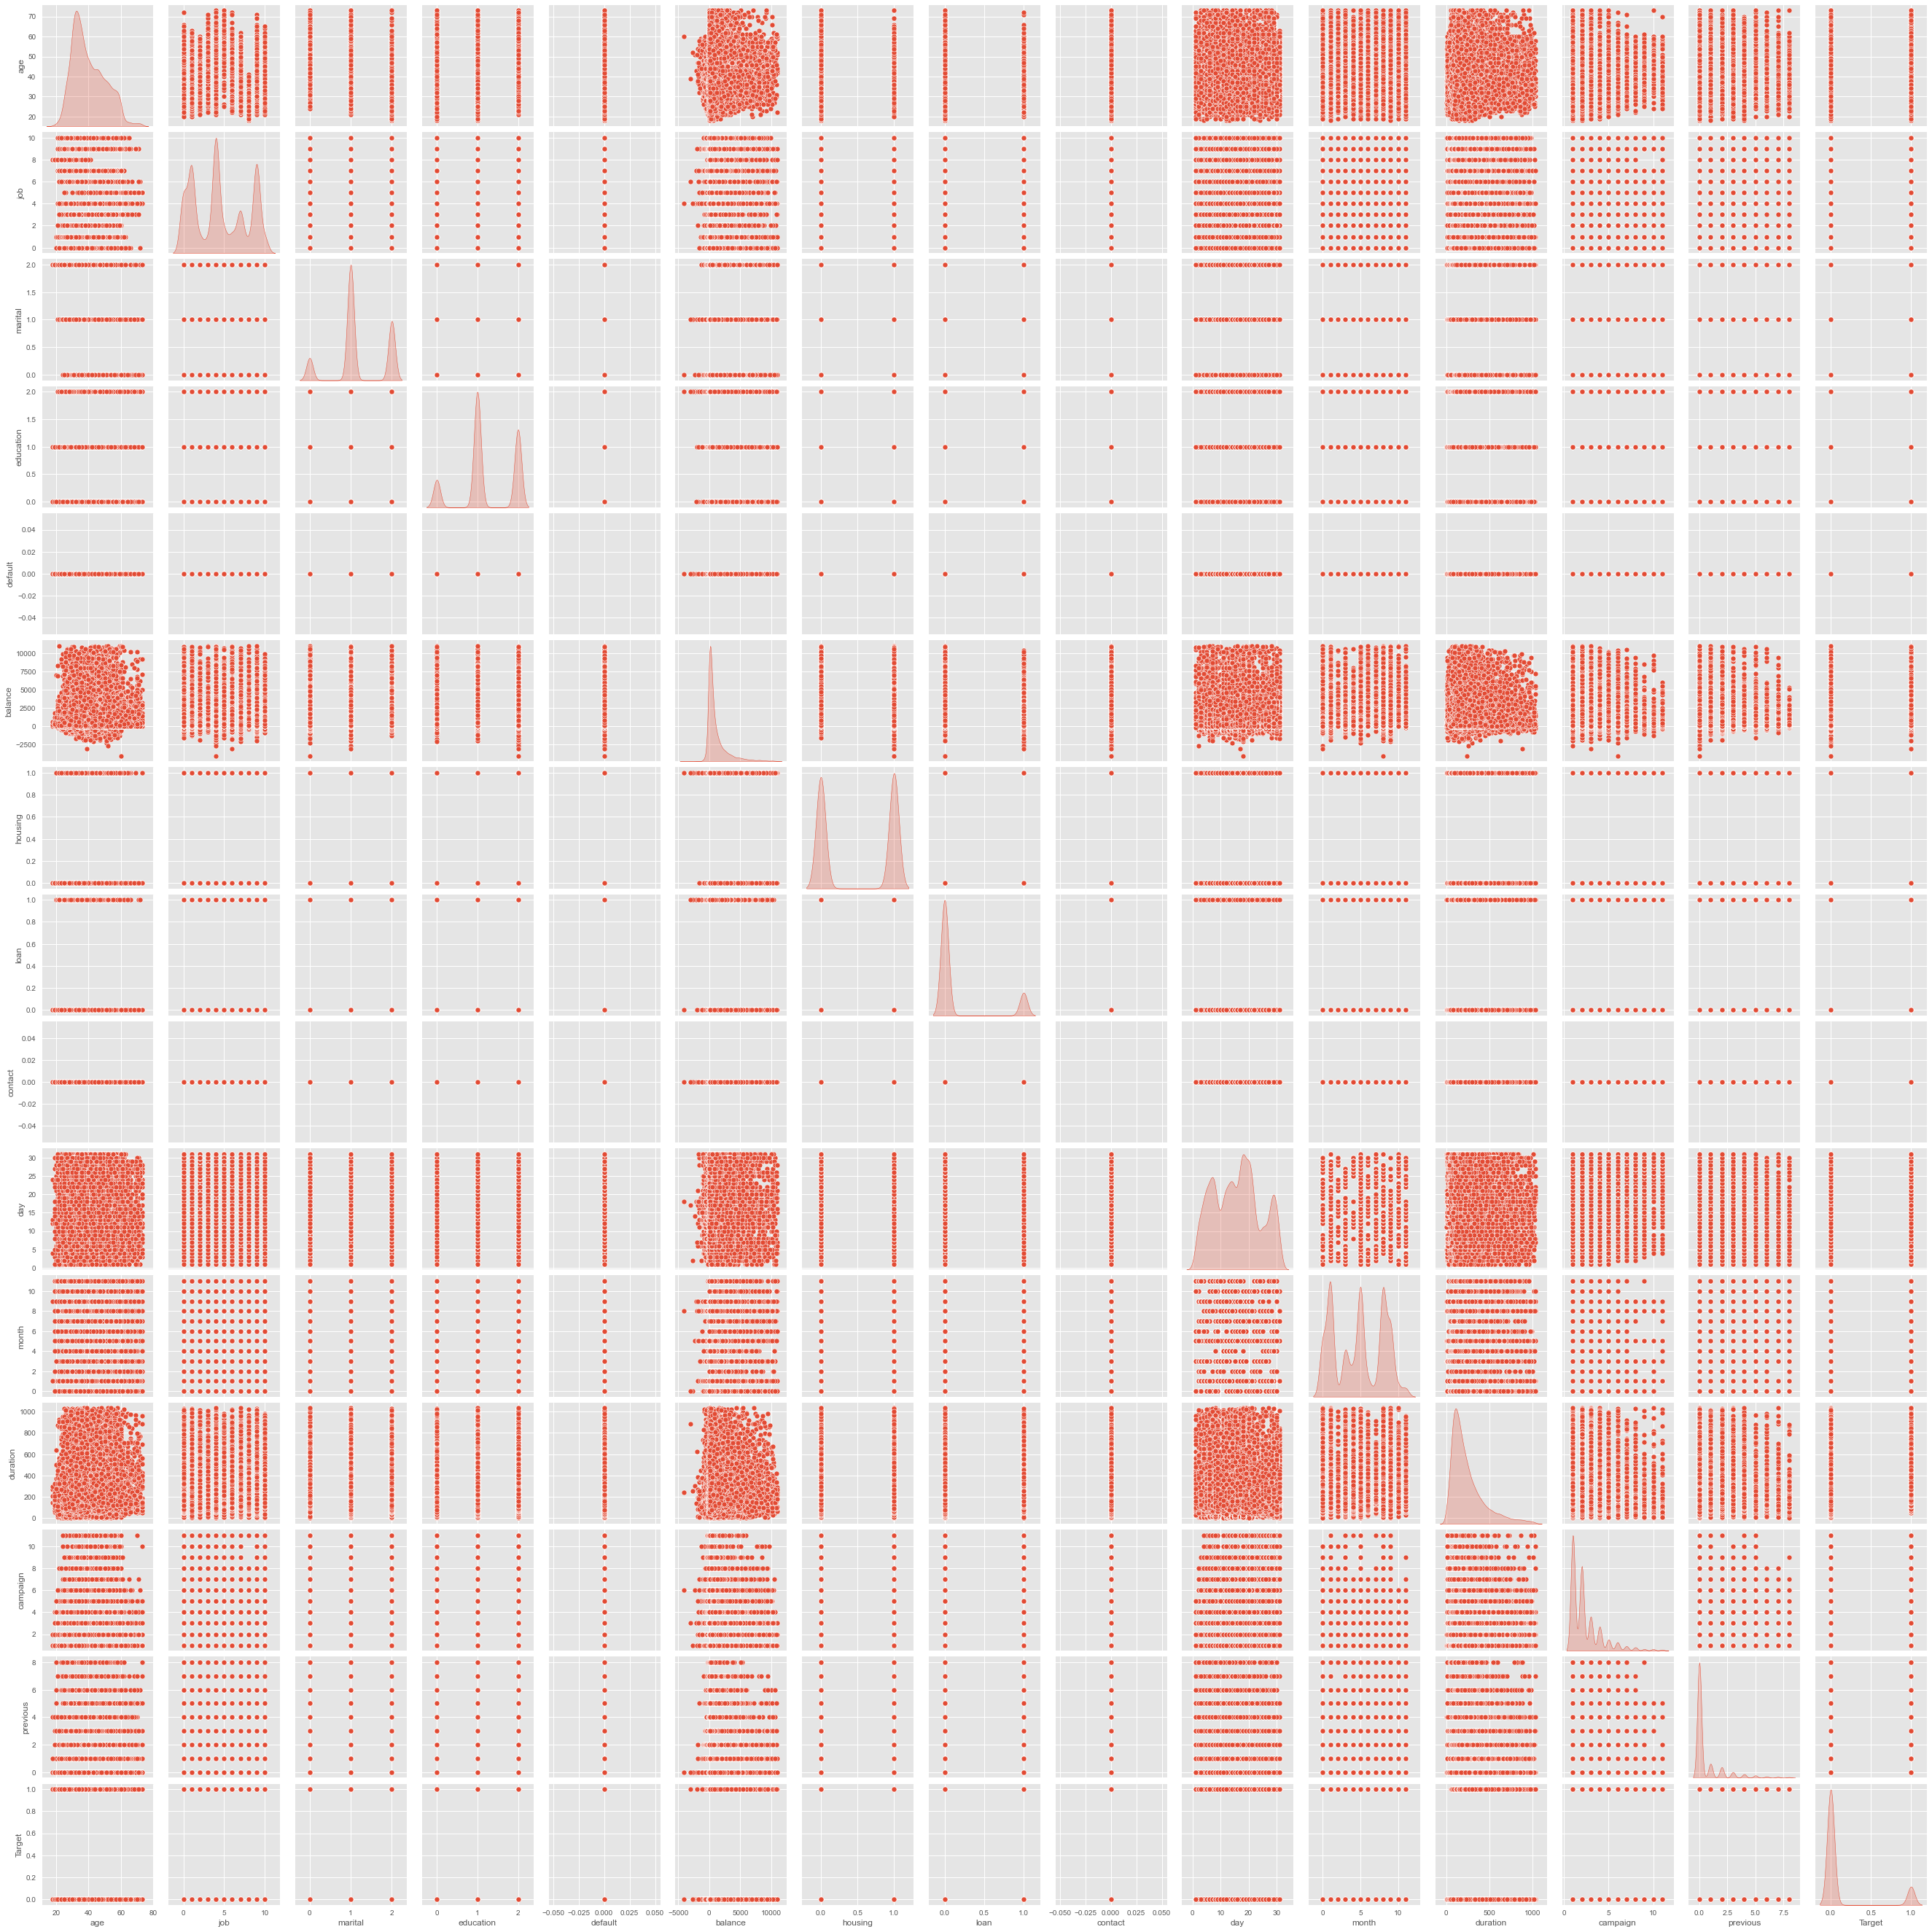

In [50]:
sns.pairplot(data =df_clean,diag_kind ='kde')

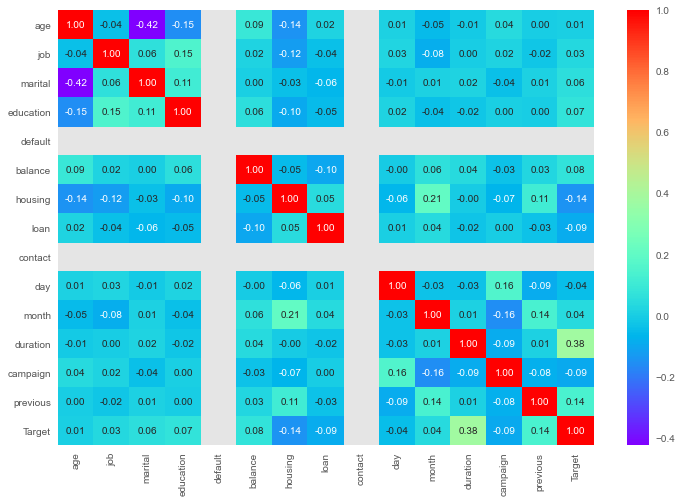

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

#

* There are some relatively moderate  correlations among the variales such as: age and marital,marital and education,campaign and day, target and duration, housing and month. These will be studied a bit more

In [52]:
#show the relationship between the target and each attribute
df.groupby(df_clean['Target']).mean()

,age,marital,default,balance,housing,loan,day,duration,campaign,previous,Target
Target,,,,,,,,,,,
0.00,40.07,1.17,0.00,"1,079.96",0.54,0.18,15.88,212.53,2.46,0.56,0.00
1.00,40.25,1.28,0.00,"1,474.88",0.33,0.08,14.86,423.28,1.97,1.13,1.00


#### b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots


<AxesSubplot:xlabel='Target', ylabel='count'>

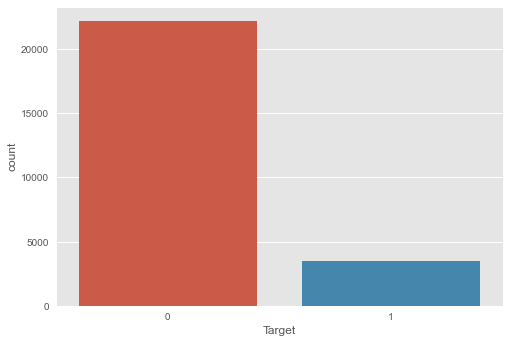

In [53]:
sns.countplot(df_clean["Target"])
# the plot below show that the degative class is the more dominant class. Our model is  likely 
# able to predict those clients who do nt take a term loan.

In [54]:

pd.crosstab(df_clean.Target, df_clean.age, margins=True)

age,18,19,20,21,22,23,24,25,26,27,...,65,66,67,68,69,70,71,72,73,All
Target,,,,,,,,,,,,,,,,,,,,,
0,2,14,11,27,38,75,115,230,388,443,...,25,25,16,7,16,29,15,15,15,22199
1,2,7,8,14,33,33,51,87,101,91,...,15,17,18,16,12,12,17,16,17,3520
All,4,21,19,41,71,108,166,317,489,534,...,40,42,34,23,28,41,32,31,32,25719


In [55]:
pd.crosstab(df_clean.Target, df_clean.education, margins=True)

education,0,1,2,All
Target,,,,
0,2894,11761,7544,22199
1,305,1695,1520,3520
All,3199,13456,9064,25719


In [56]:
pd.crosstab(df_clean.Target, df_clean.default, margins=True)

default,0,All
Target,,
0,22199,22199
1,3520,3520
All,25719,25719


In [57]:
pd.crosstab(df_clean.Target, df_clean.housing, margins=True)

housing,0,1,All
Target,,,
0,10276,11923,22199
1,2362,1158,3520
All,12638,13081,25719


In [58]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,Target
12657,27,4,2,1,0,35,0,0,0,4,5,255,1,0,0
12658,54,1,1,0,0,466,0,0,0,4,5,297,1,0,0
12659,43,1,1,1,0,105,0,1,0,4,5,668,2,0,0
12661,27,9,2,1,0,126,1,1,0,4,5,436,4,0,0
12664,29,1,2,0,0,343,0,0,0,4,5,39,2,0,0


## Deliverable – 2 (Prepare the data for analytics) – (10)

### 1. Ensure the attribute types are correct. If not, take appropriate actions.

### 2. Get the data model ready. 
#### In getting the data model ready we did the following
- dropped appropriate columns 
- addressed the outliers observed in column Experience
- apply one-hot encoding and Label encodingwhere applicable

- the only remaining item is to configure such that the 'Target' column(dependent variable) becomes the target variable and the remaining columns the independent variables

In [59]:
#separating dependent and independent variables
Y = df_clean['Target']
X = df_clean.drop(columns = {'Target'})
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,Target
12657,27,4,2,1,0,35,0,0,0,4,5,255,1,0,0
12658,54,1,1,0,0,466,0,0,0,4,5,297,1,0,0
12659,43,1,1,1,0,105,0,1,0,4,5,668,2,0,0
12661,27,9,2,1,0,126,1,1,0,4,5,436,4,0,0
12664,29,1,2,0,0,343,0,0,0,4,5,39,2,0,0


### 3. Transform the data i.e. scale / normalize if required


* we did not see the need for scaling or normalization of data

### 4. Create the training set and test set in ratio of 70:30


In [61]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
features = [col for col in df_clean.columns if col != 'Target']

X_train, X_test, y_train, y_test =train_test_split(df_clean.drop('Target',axis=1), df_clean['Target'], test_size=.30,
                                                   random_state=22)
X_train.shape,X_test.shape

# 18003 rows used for training and 7716 rows used for test

((18003, 14), (7716, 14))

## Deliverable – 3 (create the ensemble model) – (30)

### 1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)


####  Please note !!!! : In the following some of the code snippet used for the metrics and visualization was taken, with permission, from the course notes mentor session week 2. 

In [62]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=22)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=22, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on testdata

In [64]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.87


In [65]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


from the prediction frm train and test data, neither overfitting nor underfitting was observed

In [66]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6649
           1       0.59      0.20      0.29      1067

    accuracy                           0.87      7716
   macro avg       0.74      0.59      0.61      7716
weighted avg       0.84      0.87      0.84      7716



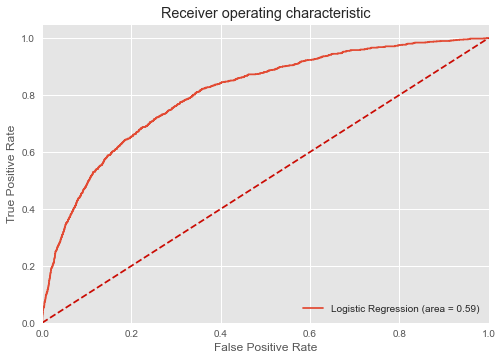

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

logreg_025 = LogisticRegression(class_weight="balanced")
logreg_025.fit(X_train, y_train)
THRESHOLD = 0.25
preds = np.where(logreg_025.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.46
recall,0.95
precision,0.20
roc_auc_score,0.67


In [69]:
logreg_065 = LogisticRegression(class_weight="balanced")
logreg_065.fit(X_train, y_train)
THRESHOLD = 0.65
preds = np.where(logreg_065.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.82
recall,0.57
precision,0.40
roc_auc_score,0.71


In [70]:
logreg_095 = LogisticRegression(class_weight="balanced")
logreg_095.fit(X_train, y_train)
THRESHOLD = 0.95
preds = np.where(logreg_095.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.87
recall,0.11
precision,0.63
roc_auc_score,0.55


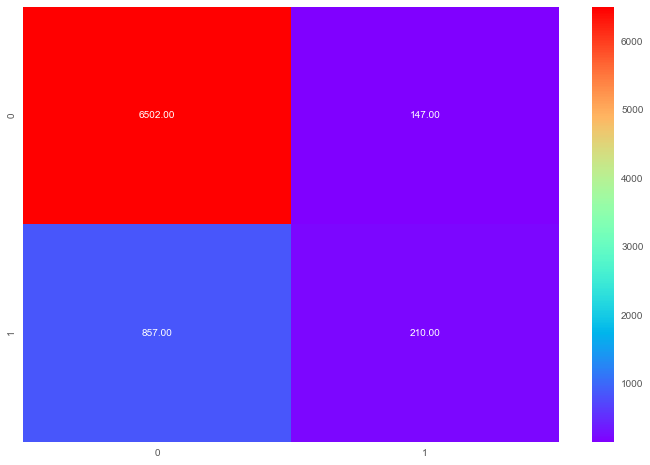

In [71]:
confusion_matrix = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix,annot=True,fmt='.2f',cmap='rainbow' )
plt.show()

In [72]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg_065.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
6,housing,0.65
13,previous,0.46
12,campaign,0.42
7,loan,0.23
3,education,0.16
2,marital,0.07
10,month,0.02
0,age,0.01
1,job,0.01
11,duration,0.01


In [73]:
y_predict = logreg_065.predict(X_test)              # Predicting the target variable on testdata

In [74]:
acc_LR = accuracy_score(y_test, y_predict)

In [75]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': acc_LR})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.74


In [76]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 3 and size of the leaf node to 5 (no particular reason for 
# selecting this)

model_entropy=DecisionTreeClassifier(criterion='entropy')

In [77]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
model_entropy.score(X_train, y_train)  # performance on train data

1.0

In [79]:
model_entropy.score(X_test, y_test)  # performance on test data

0.8360549507516848

* The results show that there is data overfitting in our Decision Tree model

In [80]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 22,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

In [81]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

xvar = df_clean.drop('Target', axis=1)
feature_cols = xvar.columns

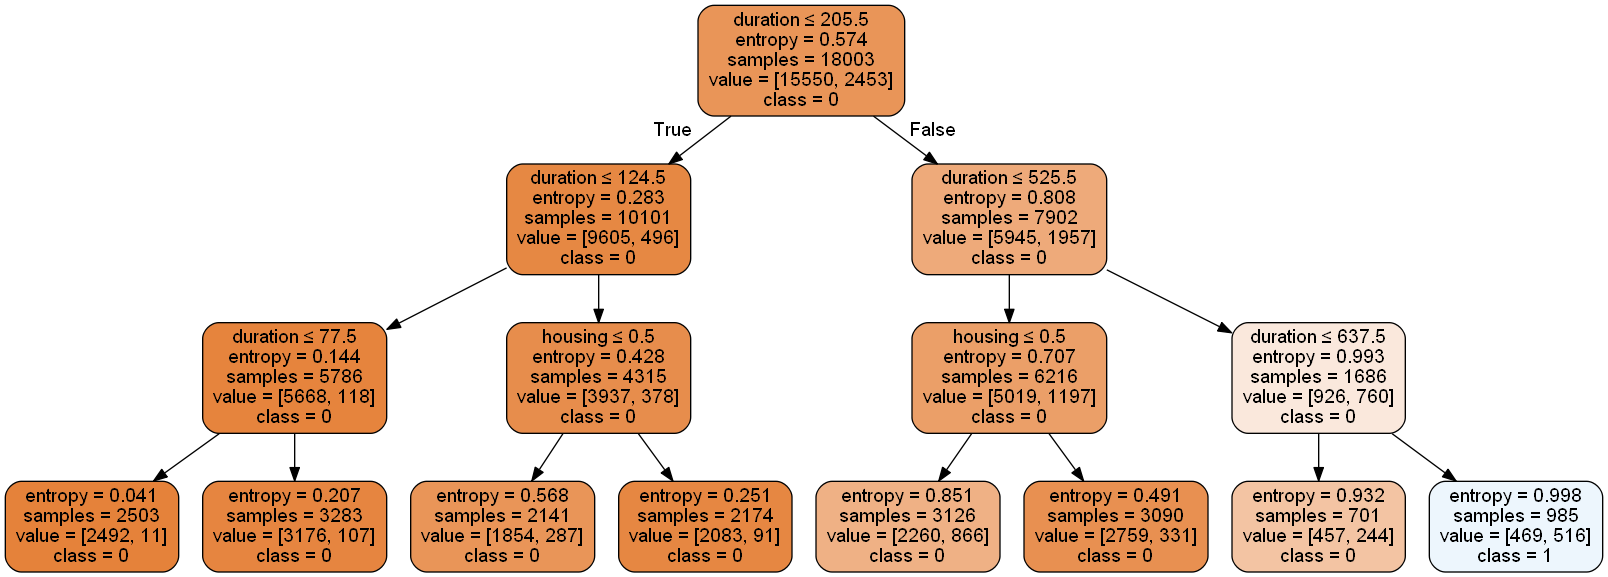

In [82]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('data_pruned.png')
Image(graph.create_png())

In [83]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [84]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.8668999481596682
0.8663556073987668


In [85]:
acc_DT = accuracy_score(y_test, preds_pruned)

In [86]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.85
housing,0.15
age,0.00
job,0.00
marital,0.00
education,0.00
default,0.00
balance,0.00
loan,0.00
contact,0.00


### 2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

In [87]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
#resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.74
0,Decision Tree,0.87


In [88]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [89]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [90]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.74
0,Decision Tree,0.87
0,Random Forest,0.88


### Bagging

In [91]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [92]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [93]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.74
0,Decision Tree,0.87
0,Random Forest,0.88
0,Bagging,0.88


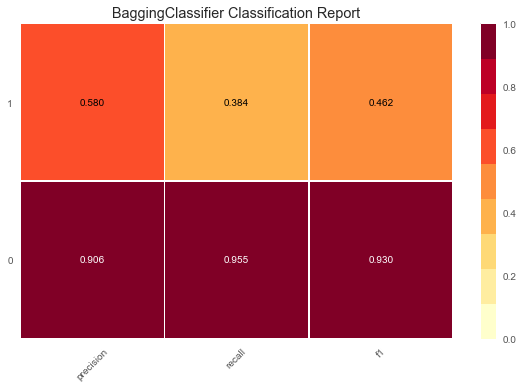

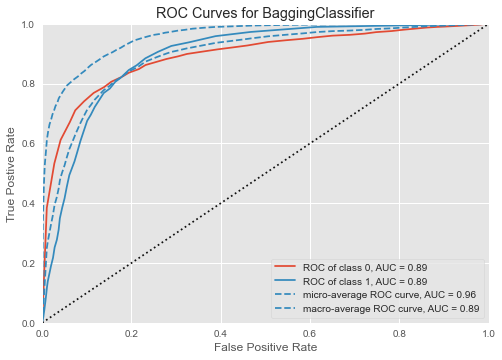

<AxesSubplot:title={'center':'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [94]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Gradient Boosting

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [96]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [97]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
#resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.74
0,Decision Tree,0.87
0,Random Forest,0.88
0,Bagging,0.88
0,Gradient Boost,0.88


### Ada Boosting

In [98]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [99]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [100]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.74
0,Decision Tree,0.87
0,Random Forest,0.88
0,Bagging,0.88
0,Gradient Boost,0.88
0,Adaboost,0.87


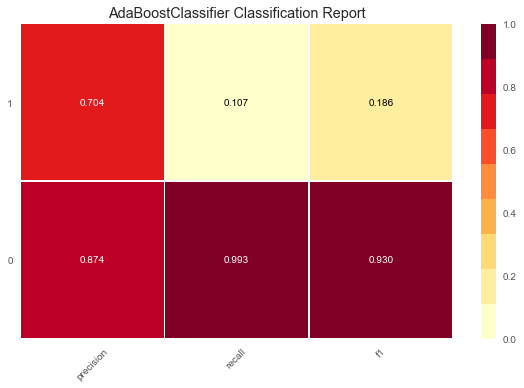

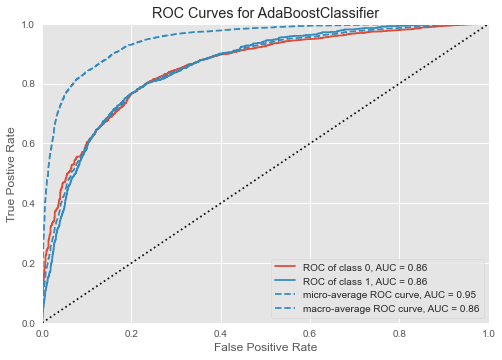

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [101]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### 3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)


In [102]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.74
0,Decision Tree,0.87
0,Random Forest,0.88
0,Bagging,0.88
0,Gradient Boost,0.88
0,Adaboost,0.87
0,Adaboost,0.87


* In this project we investigated the use of various models such as :Logistics Regression, Decision 
Tree, Random Forest, Bagging, Gradient Boost and Ada Boost. For these models we used essentially the default values and tried to vary a little the main hyperparameters. Therefore no claim to model optimal tuning is made. However, given the limitations, the table summary above suggests the logistic regression had the worst result and was worse than the Decision Tree. The Random Forest ensemble method was better than the decision Tree. This is expected as the Random Forest is built by training many trees. We experimented with varying the number of Trees for the Random Forest but found the setting of 50 to yield the best result. The Bagging and Gradient Boost method had the same performances as the Random Forest and both outperfomed the AdaBoost. This may be due to the ability of the Gradient Boost and Bagging methods to reduce the bias of the data.

### Results vs Business Problem

* In this project, the business objective was to use the data collected from existing Bank Clients to build a model that will help the marketing team identify potential customers who were relatively more likely to subscribe term deposit and thus increase their hit ratio.
* In this project we investigated various prediction models and in general had good accuracy with the Random Forest, Bagging and Gradient Boost models. However we did not fully investigate optimal tuning of the corresponding hyperparameters and therefore still have some work to do. The following are the findings from our predictive models.
* Our model was more suited to predicting the negative class i.e. those bank clients that will not subscribe to the term deposit than predicting customers who will subscribe. However knowledge of the negative class can also help in narrowing the cases for the positive class.
* We also observed that the outcome data  from previous marketing campaign did not help as a feature for our model. Also the data on contact  was not useful as a majority of bank clients were never contacted after the previous marketing campaign. 
* In summary we believe that the results addressed the business problem but more work on the predictive model is needed.
